In [738]:
%pylab inline
import ThonkTools as TT
from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [739]:
def csvReader(x):
    """
        csvReader takes a csv file and creats a list with lists of the colloms.
        It also turns strings into numbers if possible.
    """
    import csv
    with open(x, 'r') as csvFile:
        reader = csv.reader(csvFile)
        l = None
        for row in reader:
            if l == None:
                l = [[] for i in range(len(row))]
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
            else:
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
    return l    
    csvFile.close()

In [740]:
data_1 = csvReader('lockin_2.csv')
data_2 = csvReader('lockin_3.csv')
data_3 = csvReader('lockin_4.csv')
data_4 = csvReader('lockin_5.csv')
data_5 = csvReader('lockin_6.csv')
data_6 = csvReader('lockin_7.csv')
data_7 = csvReader('lockin_8.csv')
data_8 = csvReader('lockin_9.csv')

In [741]:
def sägezahn(x):
    y = x[2][2:]
    x = x[0][2:]
    for i in range((len(x))):
        if abs(y[i] - y[i+1]) > 5:
            minimum = y[i+1]
            break
        else:
            None
    k = y.index(minimum)
    y = y[k:] #minimum von x bei x[0]
    x = x[k:]
    l = y.index(max(y))
    y = y[:l]
    x = x[:l]
    xnew,ynew = TT.linfit(x,y)
    k = TT.linfit_pm(x,y)
    return xnew, ynew, k

def gausfit_ab(x, y, p0=None, r=None, d=None):
    import numpy as np
    return TT.fit(x, y, func=lambda x, a, b, c, d: (a * (x - b) * e**(- (x - b)**2 / (2 * c**2))) / c**2 + d, r=r, d=d, p0=p0)
    
def gausfit_ab_pm(x, y, p0=None):
    import numpy as np
    return TT.fit_pm(x, y, func=lambda x, a, b, c, d: (a * (x - b) * e**(- (x - b)**2 / (2 * c**2))) / c**2 + d, p0=p0)

def sp_unp(x):
    x_val = x.nominal_value
    x_err = x.std_dev
    return x_val, x_err

# Plots für Datenpunkte ohne 2.Fit

No handles with labels found to put in legend.


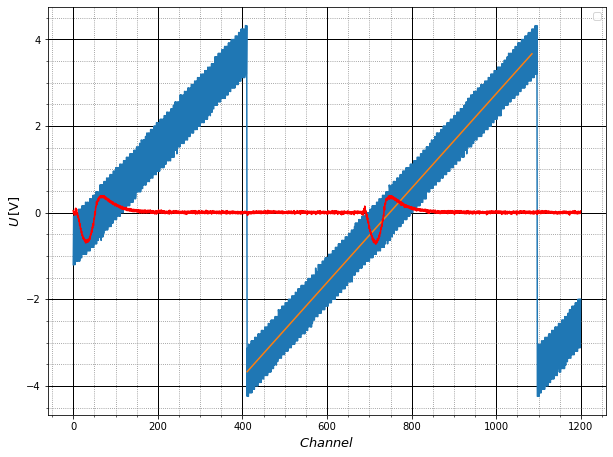

In [742]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

k = data_1
k2 = sägezahn(k)
plt.plot(k[0][2:],k[2][2:])
plt.plot(k2[0],k2[1])
plt.plot(k[0][2:],k[1][2:],color='red')

###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('Dateiname.png')
plt.show()

# Fits und Parameter und Frequenz


In [749]:
#Data 1
f_1 = 19.2625
data_1_pm = gausfit_ab_pm(data_1[0][2:1200],data_1[1][2:1200],p0=(0.10,725,20,0))
data_1_x, data_1_y = gausfit_ab(data_1[0][2:1200],data_1[1][2:1200],p0=(0.10,725,20,0),r=1)
data_1_d = data_1_pm[0][1]
data_1_Sd = - sägezahn(data_1)[2][0][1]/sägezahn(data_1)[2][0][0]
data_1_Dd = data_1_d - data_1_Sd

#Data 2
f_2 = 19.2629
data_2_pm = gausfit_ab_pm(data_2[0][2:1200],data_2[1][2:1200],p0=(0.10,100,20,0))
data_2_x, data_2_y = gausfit_ab(data_2[0][2:1200],data_2[1][2:1200],p0=(0.10,100,20,0),r=1)
data_2_d = data_2_pm[0][1]
data_2_Sd = - sägezahn(data_2)[2][0][1]/sägezahn(data_2)[2][0][0]
data_2_Dd = data_2_d - data_2_Sd

#Data 3
f_3 = 19.0935
data_3_pm = gausfit_ab_pm(data_3[0][2:1200],data_3[1][2:1200],p0=(0.10,1150,20,0))
data_3_x, data_3_y = gausfit_ab(data_3[0][2:1200],data_3[1][2:1200],p0=(0.10,1150,20,0),r=1)
data_3_d = data_3_pm[0][1]
data_3_Sd = - sägezahn(data_3)[2][0][1]/sägezahn(data_3)[2][0][0]
data_3_Dd = data_3_d - data_3_Sd

#Data 4
f_4 = 19.0041
data_4_pm = gausfit_ab_pm(data_4[0][2:1200],data_4[1][2:1200],p0=(0.20,800,20,0))
data_4_x, data_4_y = gausfit_ab(data_4[0][2:1200],data_4[1][2:1200],p0=(0.20,800,20,0),r=1)
data_4_d = data_4_pm[0][1]
data_4_Sd = - sägezahn(data_4)[2][0][1]/sägezahn(data_4)[2][0][0]
data_4_Dd = data_4_d - data_4_Sd

#Data 5
f_5 = 19.1063
data_5_pm = gausfit_ab_pm(data_5[0][2:1200],data_5[1][2:1200],p0=(0.20,1000,20,0))
data_5_x, data_5_y = gausfit_ab(data_5[0][2:1200],data_5[1][2:1200],p0=(0.20,1000,20,0),r=1)
data_5_d = data_5_pm[0][1]
data_5_Sd = - sägezahn(data_5)[2][0][1]/sägezahn(data_5)[2][0][0]
data_5_Dd = data_5_d - data_5_Sd

#Data 6
f_6 = 19.2093
data_6_pm = gausfit_ab_pm(data_6[0][2:1200],data_6[1][2:1200],p0=(0.10,200,20,0))
data_6_x, data_6_y = gausfit_ab(data_6[0][2:1200],data_6[1][2:1200],p0=(0.10,200,20,0),r=1)
data_6_d = data_6_pm[0][1]
data_6_Sd = - sägezahn(data_6)[2][0][1]/sägezahn(data_6)[2][0][0]
data_6_Dd = data_6_d - data_6_Sd

#Data 7
f_7 = 19.2518
data_7_pm = gausfit_ab_pm(data_7[0][2:1200],data_7[1][2:1200],p0=(0.10,200,20,0))
data_7_x, data_7_y = gausfit_ab(data_7[0][2:1200],data_7[1][2:1200],p0=(0.10,200,20,0),r=1)
data_7_d = data_7_pm[0][1]
data_7_Sd = - sägezahn(data_7)[2][0][1]/sägezahn(data_7)[2][0][0]
data_7_Dd = data_7_d - data_7_Sd

#Data 8
f_8 = 19.1344
data_8_pm = gausfit_ab_pm(data_8[0][2:1200],data_8[1][2:1200],p0=(0.10,350,20,0))
data_8_x, data_8_y = gausfit_ab(data_8[0][2:1200],data_8[1][2:1200],p0=(0.10,350,20,0),r=1)
data_8_d = data_8_pm[0][1]
data_8_Sd = - sägezahn(data_8)[2][0][1]/sägezahn(data_8)[2][0][0]
data_8_Dd = data_8_d - data_8_Sd

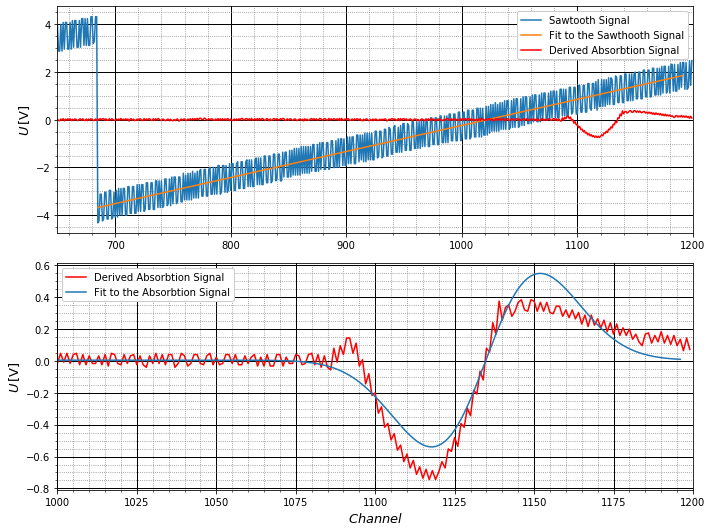

In [761]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Axes / Grid

import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)

#Diagramm 1

ax1 = fig.add_subplot(gs1[0])  

k = data_3                                                           #Mehrere stellen anpassen für dateien
k2 = sägezahn(k)
plt.plot(k[0][2:],k[2][2:], label='Sawtooth Signal')
plt.plot(k2[0],k2[1], label='Fit to the Sawthooth Signal')
plt.plot(k[0][2:],k[1][2:],color='red',label='Derived Absorbtion Signal')

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)

plt.legend(framealpha=1)

ax1.set_xlim([650,1200])                                                    #Bereich weglassen oder auf Bild einstellen

ax1.grid(which='major', linestyle='-', linewidth='1', color='black')
ax1.grid(which='minor', linestyle=':', color='gray')
ax1.minorticks_on()

#Diagramm 2

ax2 = fig.add_subplot(gs1[1])

plt.plot(k[0][2:],k[1][2:],color='red', label='Derived Absorbtion Signal')
plt.plot(data_3_x, data_3_y, label='Fit to the Absorbtion Signal')              #2x

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)

plt.legend(framealpha=1)

ax2.set_xlim([1000,1200])                                                   #Bereich weglassen oder auf Bild einstellen

ax2.grid(which='major', linestyle='-', linewidth='1', color='black')
ax2.grid(which='minor', linestyle=':', color='gray')
ax2.minorticks_on()

#Ende

gs1.tight_layout(fig)

#plt.savefig('LockInx.png')
plt.show()

In [756]:
def fit(x, y, func=lambda x: x, p0=None, r=None, d=None, sigma=None):
    """
        fit takes data points, calculates the curve fit, and gives back
        the values with which the curve can be plotted
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: the function type the curve_fit will be applied to.
        r: determines the size of steps in which the x-achse intervall is split.
        d: tuple which determines the start and end point of the x-achse intervall on which the
            will be drawn. If not given the curve will be drawn between the largest and the smalest
            given x-value.
        Returns:
        -----------
        xnew: x-value with which the fitted curve can be plotted.
        ynew: y-value with which the fitted curve can be plotted.
    """
    import numpy as np
    from scipy.optimize import curve_fit
    popt, pvoc = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    if d == None:
        if r == None:
            xnew = np.arange(min(x), max(x), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(x), max(x), r)
    else:
        if r == None:
            xnew = np.arange(min(d), max(d), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(d), max(d), r)
    ynew = func(xnew, *params)
    return xnew, ynew

def linfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, a, b,: a * x + b, r=r, d=d, p0=p0, sigma=sigma)

def fit_pm(x, y, func=lambda x: x, p0=None, sigma=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2
    
def linfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0, sigma=sigma)

# Eichung Oszi/Frequenz

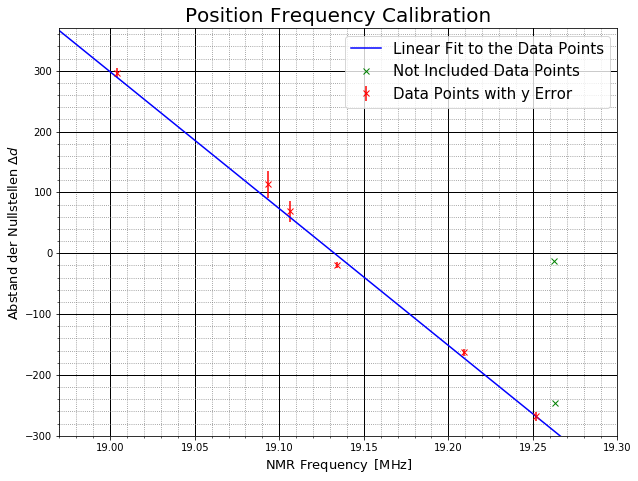

In [762]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

f_12 = [f_1,f_2]
Dd_12 = [sp_unp(data_1_Dd)[0],sp_unp(data_2_Dd)[0]]
#Dd_err = [sp_unp(data_1_Dd)[1],sp_unp(data_2_Dd)[1],sp_unp(data_3_Dd)[1],sp_unp(data_4_Dd)[1],sp_unp(data_5_Dd)[1],sp_unp(data_6_Dd)[1],sp_unp(data_7_Dd)[1],sp_unp(data_8_Dd)[1]]

f = [f_3,f_4,f_5,f_6,f_7,f_8]
Dd = [sp_unp(data_3_Dd)[0],sp_unp(data_4_Dd)[0],sp_unp(data_5_Dd)[0],sp_unp(data_6_Dd)[0],sp_unp(data_7_Dd)[0],sp_unp(data_8_Dd)[0]]
Dd_err = [sp_unp(data_3_Dd)[1],sp_unp(data_4_Dd)[1],sp_unp(data_5_Dd)[1],sp_unp(data_6_Dd)[1],sp_unp(data_7_Dd)[1],sp_unp(data_8_Dd)[1]]

ei_x, ei_y = linfit(f, Dd, sigma=Dd_err,r=(0.1),d=(18.97,19.3))
ei_pm = linfit_pm(f, Dd, sigma=Dd_err)

plt.errorbar(f, Dd, Dd_err, fmt="x", label='Data Points with y Error', color='red')
plt.plot(ei_x,ei_y,label='Linear Fit to the Data Points', color='blue')
plt.plot(f_12,Dd_12,'x', label='Not Included Data Points', color='green')

###   Label / Title

plt.ylabel(r'Abstand der Nullstellen $\Delta d$', fontsize=13)
plt.xlabel(r'NMR Frequency $\,[\mathrm{MHz}]$', fontsize=13)
plt.title('Position Frequency Calibration', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([18.97,19.3])
axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('Eichung.png')
plt.show()

In [758]:
#e1_v, e1_e = sp_unp(ei_pm[0][1])
#e2_v, e2_e = sp_unp(ei_pm[0][0])
Null_d = - ei_pm[0][1].nominal_value/ei_pm[0][0]
#Null_d = -e1_v/e2_v
print('Frequency=',Null_d)
print(ei_pm)

Frequency= 19.1+/-0.6
(array([-2248.5894919501343+/-68.70357498064561,
       43021.38008866553+/-1316.037191116732], dtype=object), 0.9945306399051924)
